In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import scipy.stats as stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
matplotlib.rc("font",family="Malgun Gothic")
matplotlib.rc("axes",unicode_minus=False)

# CSV 파일 경로를 지정하세요
file_path = 'final_data1.csv'

# pandas를 사용하여 CSV 파일을 읽어옵니다
df = pd.read_csv(file_path)

In [59]:
# 데이터프레임의 내용을 출력합니다
column_names = df.columns.tolist()

print(column_names)

['회원번호', '회원상태', '구매수량', '구매금액', '주문일시', '배송시작일', '배송완료일', '사용 적립금', '사용 포인트 네이버', '주문취소여부', '주문시간', '제품번호', '배송기간', '오전오후', '성별', '나이', '등록카드', '결혼', '구독여부', '주소지', '세부주소지', '물품대분류', '물품중분류', '식품/비식품', '유기신선', '주문요일', '연령대', '이용횟수', '물품명_상품중량', '물품평균금액', '고중저', '이용횟수_범주', '체리슈머']


In [105]:
morning_data = df[df['이용횟수']>2924]
morning_data['제품번호'].count()

3077

In [7]:
df['연령대'].count()

663794

# 4번 오전오후별 구매금액 2sample
귀무가설:오전오후별 구매금액의 차이가없다
대립가설:오전오후별 구매금액 차이가 있다

In [3]:

morning_data = df[df['오전오후']=='오전']['구매금액']
afternoon_data = df[df['오전오후'] == '오후']['구매금액']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 1.4170212096947103
p-value: 0.15647719581762468


#구독 여부별 구매수량 차이 분석
귀무가설 구독여부별 구매수량 차이가 있다
대립가설 구독여부별 구매수량 차이가 있다
p-value 0.05 이하이므로 대립가설 채택
구독안한 사람이 구매수량이 높게 나옴

t-statistic: -2.009954068339773
p-value: 0.04443645425176413


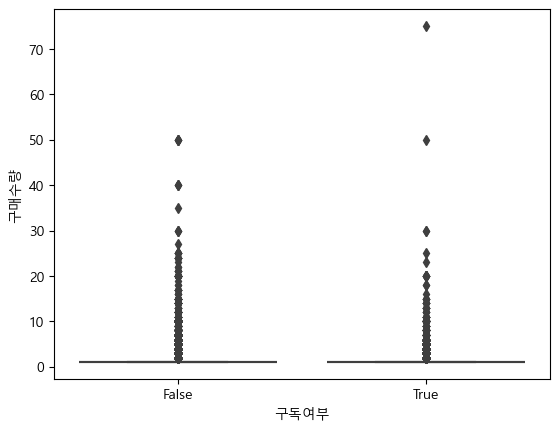

In [4]:
df['구독여부'].unique()
morning_data = df[df['구독여부']==True]['구매수량']
afternoon_data = df[df['구독여부'] ==False]['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
amount1 = df[df['구독여부'] == True]['구매수량']
amount2 = df[df['구독여부'] == False]['구매수량'] 
boxplot=sns.boxplot(x='구독여부', y='구매수량', data=df)
boxplot.figure.savefig('boxplot11.png')
print("t-statistic:", t_stat)
print("p-value:", p_value)

In [ ]:
구독 여부별 사용 적립금 차이
귀무가설 구독여부별 사용적립금 차이가 있다
대립가설 구독여부별 사용적립금 차이가 있다
p-value 0.05 이하이므로 대립가설 채택
구독안한사람이 사람이 사용적립금이 높게 나옴

t-statistic: -2.187562205501214
p-value: 0.028701854935241914


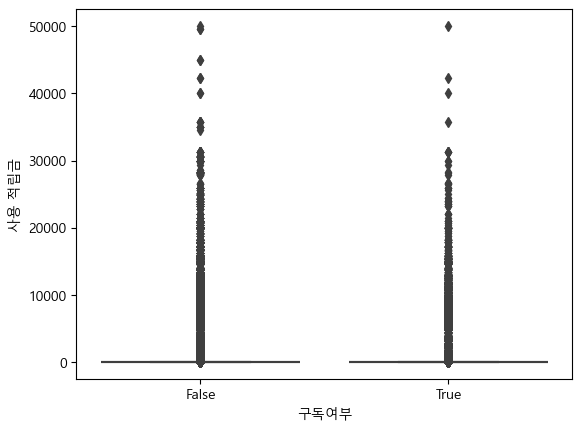

In [42]:
df['구독여부'].unique()
morning_data = df[df['구독여부']==True]['사용 적립금']
afternoon_data = df[df['구독여부'] ==False]['사용 적립금']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
boxplot=sns.boxplot(x='구독여부', y='사용 적립금', data=df)
boxplot.figure.savefig('boxplot10.png')
print("t-statistic:", t_stat)
print("p-value:", p_value)

In [471]:

df['성별'].dropna
morning_data = df[df['성별']=="남"]['구매금액']
afternoon_data = df[df['성별'] =="여"]['구매금액']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -1.4830545224049534
p-value: 0.13806040075143133


 # 이용횟수별구매수량(연속형) 에 따른 식품/비식품 주문요일 연령대 오전오후 (범주형)

Chi-square statistic: 2903.6704894774275
P-value: 0.000
Degrees of freedom: 7
Expected frequencies table:


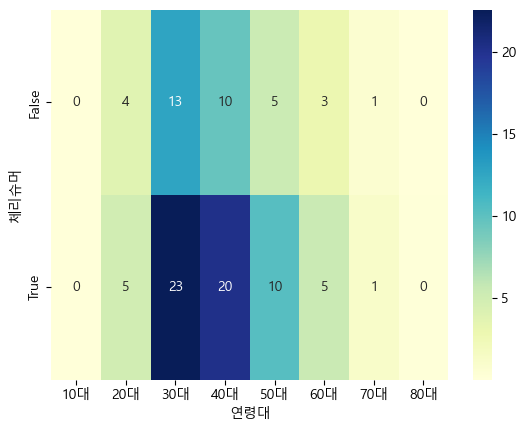

In [15]:

conditions = [
    (df['이용횟수'] < df['이용횟수'].quantile(0.25)),  # 예: 30 미만은 '적음'
    (df['이용횟수'] >= df['이용횟수'].quantile(0.25)) & (df['이용횟수'] < df['이용횟수'].median()),  # 30 이상 69 미만은 '보통'
    (df['이용횟수'] >= df['이용횟수'].median())  # 69 이상은 '많음'
]

# 범주 정의
categories = ['적음', '보통', '많음']

# 새 열 생성
df['이용횟수_범주'] = np.select(conditions, categories, default='알 수 없음')
purchase_summary = df.groupby('이용횟수_범주')['구매수량'].describe()
q2_threshold = df['구매수량'].quantile(0.5)
# '보통' 범주와 '많음' 범주에서 Q2 이하값 레코드를 필터링하여 '체리슈머' 파생변수에 True/False 할당
df['체리슈머'] = ( (df['이용횟수_범주'] == '보통') & (df['구매수량'] <= q2_threshold) | (df['이용횟수_범주'] == '많음') & (df['구매수량'] <= q2_threshold) )
# # 각 범주별 연령대의 분포
contingency_table = pd.crosstab(df['체리슈머'], df['연령대'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print(f'P-value: {p_value:.3f}')
print('Degrees of freedom:', dof)
print("Expected frequencies table:")
contingency_table_percentage = contingency_table.div(contingency_table.sum().sum()).mul(100)
hit2=sns.heatmap(contingency_table_percentage, annot=True, cmap='YlGnBu', fmt='.0f')
hit2.get_figure().savefig("heatmap01.png")

In [31]:
cherry_consumers = df[df['체리슈머'] == True]
cherry_consumers.shape[0]

430195

In [33]:
non_cherry_consumers = df[df['체리슈머'] == False]
non_cherry_consumers.shape[0]

233599

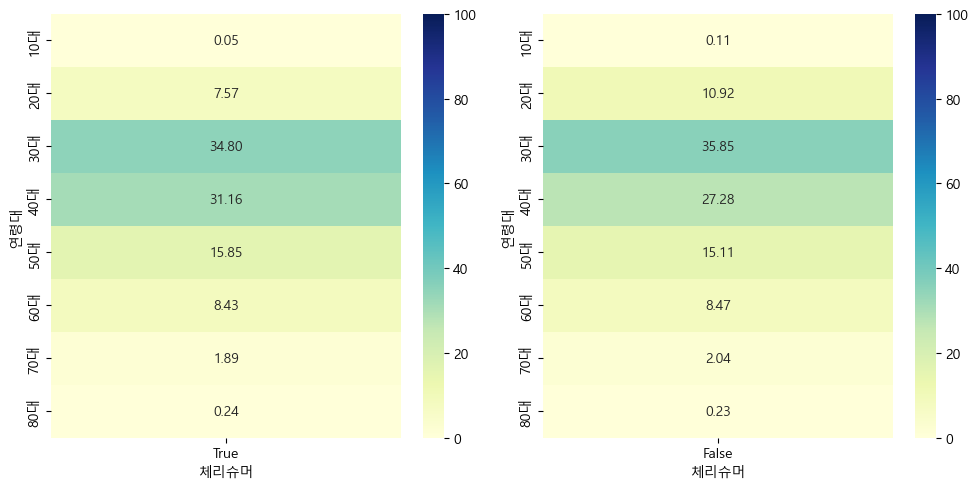

In [54]:
# 체리슈머와 비체리슈머로 데이터 필터링
cherry_consumers = df[df['체리슈머'] == True]
non_cherry_consumers = df[df['체리슈머'] == False]

# 체리슈머와 비체리슈머의 오전/오후 교차표 생성
cherry_table = pd.crosstab(cherry_consumers['연령대'], cherry_consumers['체리슈머'])
non_cherry_table = pd.crosstab(non_cherry_consumers['연령대'], non_cherry_consumers['체리슈머'])

# 전체 체리슈머와 비체리슈머의 수를 기준으로 퍼센트 변환
cherry_total = cherry_table.sum().sum()
non_cherry_total = non_cherry_table.sum().sum()

# 체리슈머와 비체리슈머 비율로 퍼센트 변환
cherry_table_percentage = cherry_table.div(cherry_total).mul(100)
non_cherry_table_percentage = non_cherry_table.div(non_cherry_total).mul(100)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cherry_table_percentage, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, vmin=0, vmax=100)
plt.subplot(1, 2, 2)
sns.heatmap(non_cherry_table_percentage, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, vmin=0, vmax=100)
plt.tight_layout()
plt.savefig('heatmap14.png')
plt.show()

In [63]:
df['회원번호'].nunique() 

12533

In [ ]:
# 귀무가설 체리슈머 에따른 연령대별 차이가 없다
# 대립가설 체리슈머에 따른 연령대별 차이가 있다.
# 대립가설 채택 P-value: 0.000<0.05 체리슈머에 따른 연령대별 차이가 있으며 특히 30,40대에 체리슈머가 많다

Chi-square statistic: 107.1350212786881
P-value: 0.000
Degrees of freedom: 6
Expected frequencies table:


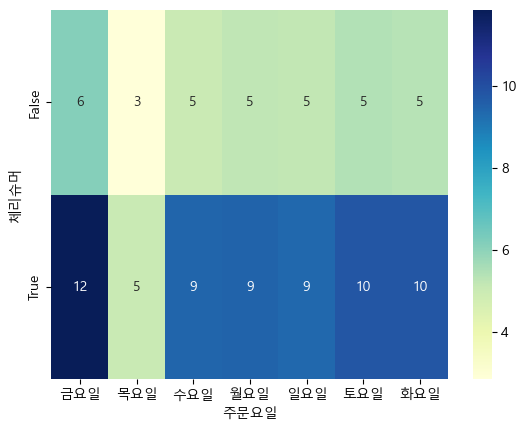

In [19]:
contingency_table = pd.crosstab(df['체리슈머'], df['주문요일'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print(f'P-value: {p_value:.3f}')
print('Degrees of freedom:', dof)
print("Expected frequencies table:")
contingency_table_percentage = contingency_table.div(contingency_table.sum().sum()).mul(100)
hit2=sns.heatmap(contingency_table_percentage , annot=True, cmap='YlGnBu', fmt='.0f')
hit2.get_figure().savefig("heatmap03.png")

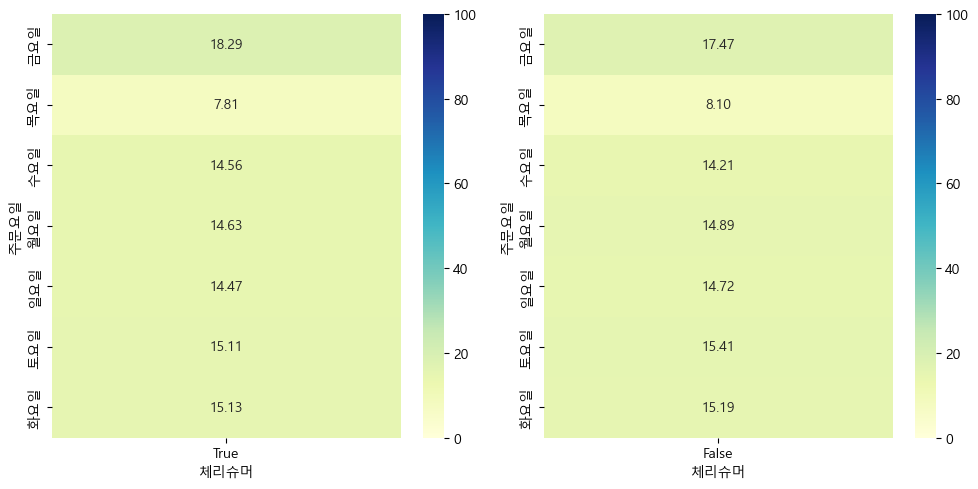

In [53]:
# 체리슈머와 비체리슈머로 데이터 필터링
cherry_consumers = df[df['체리슈머'] == True]
non_cherry_consumers = df[df['체리슈머'] == False]

# 체리슈머와 비체리슈머의 오전/오후 교차표 생성
cherry_table = pd.crosstab(cherry_consumers['주문요일'], cherry_consumers['체리슈머'])
non_cherry_table = pd.crosstab(non_cherry_consumers['주문요일'], non_cherry_consumers['체리슈머'])

# 전체 체리슈머와 비체리슈머의 수를 기준으로 퍼센트 변환
cherry_total = cherry_table.sum().sum()
non_cherry_total = non_cherry_table.sum().sum()

# 체리슈머와 비체리슈머 비율로 퍼센트 변환
cherry_table_percentage = cherry_table.div(cherry_total).mul(100)
non_cherry_table_percentage = non_cherry_table.div(non_cherry_total).mul(100)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cherry_table_percentage, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, vmin=0, vmax=100)
plt.subplot(1, 2, 2)
sns.heatmap(non_cherry_table_percentage, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, vmin=0, vmax=100)
plt.tight_layout()
plt.savefig('heatmap13.png')
plt.show()

In [53]:
cherry_consumers = df[df['체리슈머'] == True]
cherry_consumers['구매금액'].median()


7275.0

In [ ]:
# 귀무가설 체리슈머에따른 주문요일별 차이가 없다
# 대립가설 체리슈머에 따른 주문요일별 차이가 있다.
# 대립가설 채택 P-value: 0.000<0.05 이용회수별 구매수량에 따른 주문요일별 차이가 있으며 특히 금요일에 유독 체리슈머가 많은걸 알수 있다.

Chi-square statistic: 182.69975998140998
P-value: 0.000
Degrees of freedom: 2
Expected frequencies table:


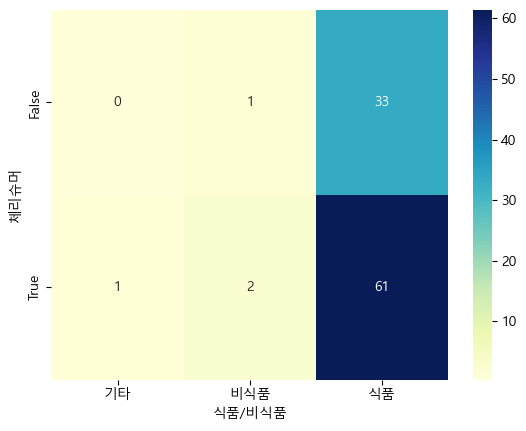

In [113]:
contingency_table = pd.crosstab(df['체리슈머'], df['식품/비식품'])
contingency_table_percentage = contingency_table.div(contingency_table.sum().sum()).mul(100)
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print(f'P-value: {p_value:.3f}')
print('Degrees of freedom:', dof)
print("Expected frequencies table:")
hit3=sns.heatmap(contingency_table_percentage , annot=True, cmap='YlGnBu', fmt='.0f')
hit3.get_figure().savefig("heatmap03.png")

Chi-square statistic: 7342.924718273861
P-value: 0.000
Degrees of freedom: 4
Expected frequencies table:


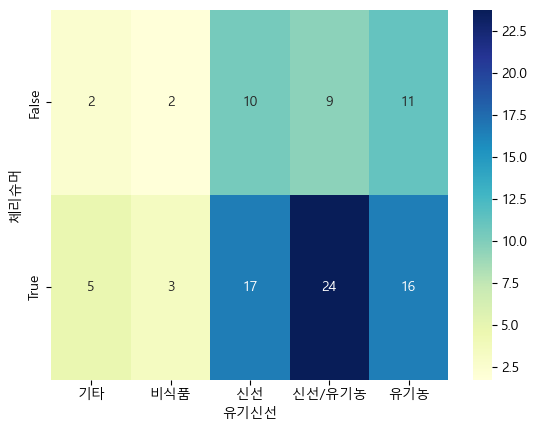

In [111]:
contingency_table = pd.crosstab(df['체리슈머'], df['유기신선'])
contingency_table_percentage = contingency_table.div(contingency_table.sum().sum()).mul(100)
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print(f'P-value: {p_value:.3f}')
print('Degrees of freedom:', dof)
print("Expected frequencies table:")
hit3=sns.heatmap(contingency_table_percentage , annot=True, cmap='YlGnBu', fmt='.0f')
hit3.get_figure().savefig("heatmap03.png")

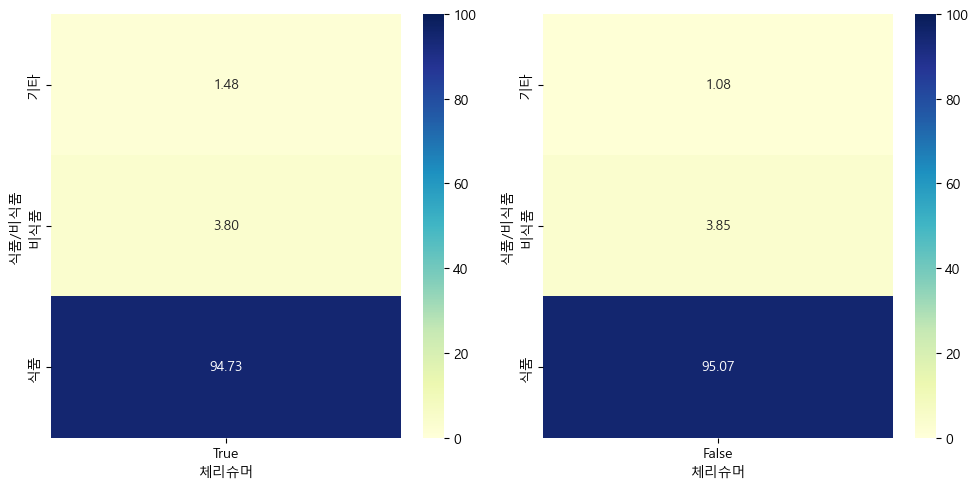

In [52]:
# 체리슈머와 비체리슈머로 데이터 필터링
cherry_consumers = df[df['체리슈머'] == True]
non_cherry_consumers = df[df['체리슈머'] == False]

# 체리슈머와 비체리슈머의 오전/오후 교차표 생성
cherry_table = pd.crosstab(cherry_consumers['식품/비식품'], cherry_consumers['체리슈머'])
non_cherry_table = pd.crosstab(non_cherry_consumers['식품/비식품'], non_cherry_consumers['체리슈머'])

# 전체 체리슈머와 비체리슈머의 수를 기준으로 퍼센트 변환
cherry_total = cherry_table.sum().sum()
non_cherry_total = non_cherry_table.sum().sum()

# 체리슈머와 비체리슈머 비율로 퍼센트 변환
cherry_table_percentage = cherry_table.div(cherry_total).mul(100)
non_cherry_table_percentage = non_cherry_table.div(non_cherry_total).mul(100)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cherry_table_percentage, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, vmin=0, vmax=100)
plt.subplot(1, 2, 2)
sns.heatmap(non_cherry_table_percentage, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, vmin=0, vmax=100)
plt.tight_layout()
plt.savefig('heatmap12.png')
plt.show()

In [ ]:
# 귀무가설 체리슈머에따른 식품 비식품별 차이가 없다
# 대립가설 체리슈머따른 식품 비식품별 차이가 있다.
# 대립가설 채택 P-value: 0.000<0.05 체리슈머에 따른 식품,비식품별 차이가 있으며 특히 식품에  체리슈머가 많은걸 알수 있다.

Chi-square statistic: 50.241525725680034
P-value: 0.000
Degrees of freedom: 1
Expected frequencies table:


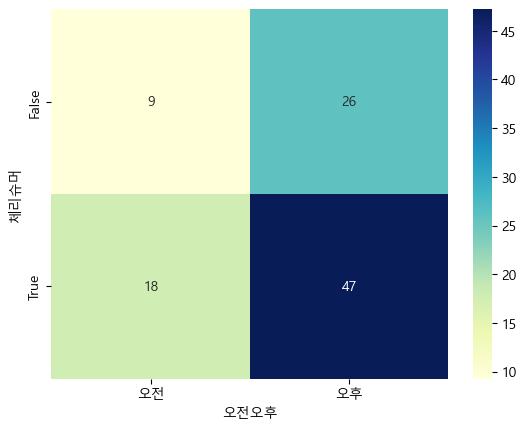

In [25]:
contingency_table = pd.crosstab(df['체리슈머'], df['오전오후'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print(f'P-value: {p_value:.3f}')
print('Degrees of freedom:', dof)
print("Expected frequencies table:")
contingency_table_percentage = contingency_table.div(contingency_table.sum().sum()).mul(100)
hit4=sns.heatmap(contingency_table_percentage, annot=True, cmap='YlGnBu', fmt='.0f')
hit4.get_figure().savefig("heatmap05.png")

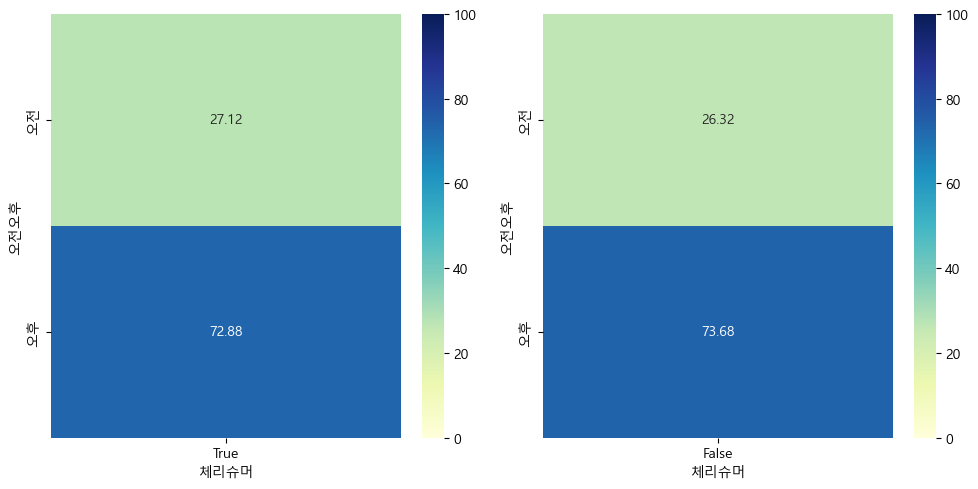

In [51]:
# 체리슈머와 비체리슈머로 데이터 필터링
cherry_consumers = df[df['체리슈머'] == True]
non_cherry_consumers = df[df['체리슈머'] == False]

# 체리슈머와 비체리슈머의 오전/오후 교차표 생성
cherry_table = pd.crosstab(cherry_consumers['오전오후'], cherry_consumers['체리슈머'])
non_cherry_table = pd.crosstab(non_cherry_consumers['오전오후'], non_cherry_consumers['체리슈머'])

# 전체 체리슈머와 비체리슈머의 수를 기준으로 퍼센트 변환
cherry_total = cherry_table.sum().sum()
non_cherry_total = non_cherry_table.sum().sum()

# 체리슈머와 비체리슈머 비율로 퍼센트 변환
cherry_table_percentage = cherry_table.div(cherry_total).mul(100)
non_cherry_table_percentage = non_cherry_table.div(non_cherry_total).mul(100)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cherry_table_percentage, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, vmin=0, vmax=100)
plt.subplot(1, 2, 2)
sns.heatmap(non_cherry_table_percentage, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, vmin=0, vmax=100)
plt.tight_layout()
plt.savefig('heatmap11.png')
plt.show()

In [ ]:
# 귀무가설 연령에따른 유기신선별 차이가 없다
# 대립가설 연령따른 유기신선별 차이가 있다.
# 대립가설 채택 P-value: 0.000<0.05 체리슈머에 따른 식품,비식품별 차이가 있으며 특히 식품에  체리슈머가 많은걸 알수 있다.

In [ ]:
contingency_table = pd.crosstab(df['연령'], df['오전오후'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print(f'P-value: {p_value:.3f}')
print('Degrees of freedom:', dof)
print("Expected frequencies table:")
contingency_table_percentage = contingency_table.div(contingency_table.sum().sum()).mul(100)
hit4=sns.heatmap(contingency_table_percentage, annot=False, cmap='YlGnBu', fmt='.0f')
hit4.get_figure().savefig("heatmap05.png")

In [ ]:
# 귀무가설 이용횟수별 구매수량 에따른 오전 오후별 차이가 없다
# 대립가설 이용회수별 구매수량에 따른 오전 오후별 차이가 있다.
# 대립가설 채택 P-value: 0.000<0.05 체리슈머에 따른 오전 오후별 차이가 있으며 특히 오후에  체리슈머가  많은걸 알수 있다.

In [ ]:
#오전오후별 금액차이는 pvalue>0.05보다 크므로 차이가없다

# 2번 식품 비식품 별 구매금액
귀무가설:식품 비식품 별 구매금액의 차이가없다
대립가설:식품 비식별 별 금액 차이가 있다

<Axes: xlabel='식품/비식품', ylabel='구매금액'>

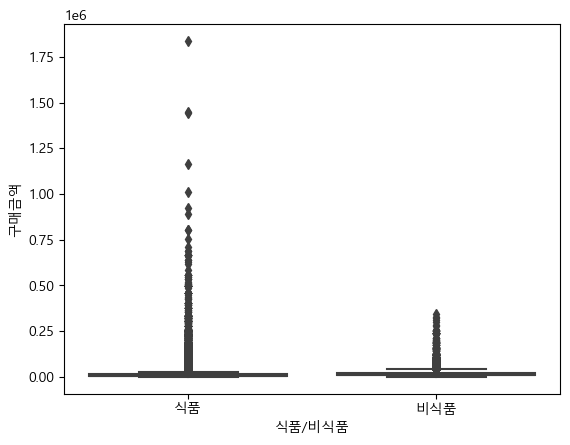

In [56]:
groups = df['식품/비식품'].unique()
groups
df_filtered = df[df['식품/비식품'].isin(['식품', '비식품'])]
amount1 = df[df['식품/비식품'] == '식품']['구매금액']
amount2 = df[df['식품/비식품'] == '비식품']['구매금액'] 
sns.boxplot(x='식품/비식품', y='구매금액', data=df_filtered)

In [30]:
# 식품과 비식품
# 귀무가설:식품 비식품  별 구매금액의 차이가없다
# 대립가설:식품 비식별 별 구매금액 차이가 있다
t_stat, p_value = stats.ttest_ind(amount1, amount2)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -62.73061904738177
p-value: 0.0


# p-value가 0.05보다 작으므로 대립가설채택 식품 비식품 품목별 구매금액의 차이가 있다
# 비식품 품목을 더많이 구매한다.

In [ ]:
# 유기신선별 구매금액
# 귀무가설:신선 비식품 신선/유기농 유기농별 구매금액 차이가 없다
#대립가설 신선  신선/유기농 유기농별 구매금액 차이가 있다 
anova 검정 결과 pvalue=0 신선 비식품 신선 유기농 

<Axes: xlabel='유기신선', ylabel='구매금액'>

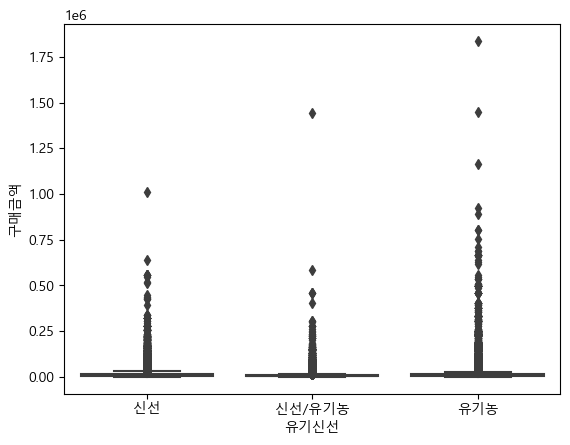

In [60]:
groups = df['유기신선'].unique()
groups
df_filtered = df[df['유기신선'].isin(['신선', '신선/유기농','유기농'])]
amount1 = df[df['유기신선'] == '신선']['구매금액']
amount2 = df[df['유기신선'] == '신선/유기농']['구매금액']
amount2 = df[df['유기신선'] == '유기농']['구매금액']
sns.boxplot(x='유기신선', y='구매금액', data=df_filtered)

In [348]:
# 귀무가설신선 비식품 신선/유기농 유기농별 구매금액 차이가 없다
#대립가섫 신선 비식품 신선/유기농 유기농별 구매금액 차이가 있다
groups = df['유기신선'].unique()
amount1 = df[df['유기신선'] == '신선']['구매금액'] 
amount2= df[df['유기신선'] == '신선/유기농']['구매금액']
amount3 = df[df['유기신선'] == '유기농']['구매금액']
# ANOVA 테스트 수행
anova_result = stats.f_oneway(amount1, amount2, amount3)

print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)\
#대립가설 신선 비식품 신선/유기농 유기농별 구매금액 차이가 있다 채택

F-statistic: 8015.669388080352
p-value: 0.0


In [62]:
# 신선과 신선/유기농
# 귀무가설:신선 신선/유기농  별 구매금액의 차이가없다
# 대립가설:식선 신선/유기농 별 구매금액 차이가 있다
t_stat, p_value = stats.ttest_ind(amount1, amount2)

print("t-statistic:", t_stat)
print("p-value:", p_value)
# 대립가설채택:신선 신선/유기농  별 구매금액의 차이가있다 신선제품을 좀더 선호한다

t-statistic: 143.45403614148333
p-value: 0.0


In [63]:
#신선/유기농 유기농
# 귀무가설:식품 비식품  별 구매금액의 차이가없다
# 대립가설:식품 비식별 별 구매금액 차이가 있다
t_stat, p_value = stats.ttest_ind(amount2, amount3)

print("t-statistic:", t_stat)
print("p-value:", p_value)
# 대립가설채택: 신선/유기농 유기농 별 구매금액의 차이가있다 유기농제품을 좀더 선호한다

t-statistic: -103.65631559168943
p-value: 0.0


In [64]:
# 신선과 유기농
# 귀무가설:신선 유기농  별 구매금액의 차이가없다
# 대립가설:신선 유기농 별 구매금액 차이가 있다
t_stat, p_value = stats.ttest_ind(amount1, amount3)

print("t-statistic:", t_stat)
print("p-value:", p_value)
# 대립가설채택: 신선 유기농 별 구매금액의 차이가있다  신선제품을 좀더 선호한다

t-statistic: 3.895038437808775
p-value: 9.820080884743459e-05


# 주문요일별 구매금액
경우1)#귀무가설:주말 평일별 구매금액 차이가없다
#대립가설 :주말 평일별 구매금액 차이가 있다
대립가설

In [43]:
#귀무가설:주말 평일별 구매금액 차이가없다
#대립가설 :주말 평일별 구매금액 차이가 있다
groups = df['주문요일'].unique()
df['주문요일'] = df['주문요일'].replace(['토요일', '일요일'], '주말')
df['주문요일'] = df['주문요일'].replace(['월요일', '화요일','수요일','목요일','금요일'], '평일')
a1= df[df['주문요일'] == '주말']['구매금액'] 
a2= df[df['주문요일'] == '평일']['구매금액']
t_stat, p_value = stats.ttest_ind(a1, a2)
print("t-statistic:", t_stat)
print("p-value:", p_value)
#귀무가설:주말 평일별 구매금액 차이가있다 귀무가설 채택

t-statistic: -0.08813044724433197
p-value: 0.9297730237080764


In [57]:
df['주문요일']

0         주말
1         주말
2         주말
3         주말
4         주말
          ..
663789    평일
663790    주말
663791    주말
663792    평일
663793    주말
Name: 주문요일, Length: 663794, dtype: object

In [76]:
#귀무가설:토요일 일요일 평일별 구매금액 차이가없다
#대립가설 :토요일 일요일별 구매금액 차이가 있다
t1= df[df['주문요일'] == '토요일']['구매금액'] 
t2= df[df['주문요일'] == '일요일']['구매금액']
t_stat, p_value = stats.ttest_ind(t1, t2)
print("t-statistic:", t_stat)
print("p-value:", p_value)
#대립가설:토요일 일요일 평일별 구매금액 차이가 있다 일요일에 구매금액이 많다

t-statistic: -2.1185482869790833
p-value: 0.034129904059828436


t-statistic: 3.1909888819835945
p-value: 0.0014180706761949592


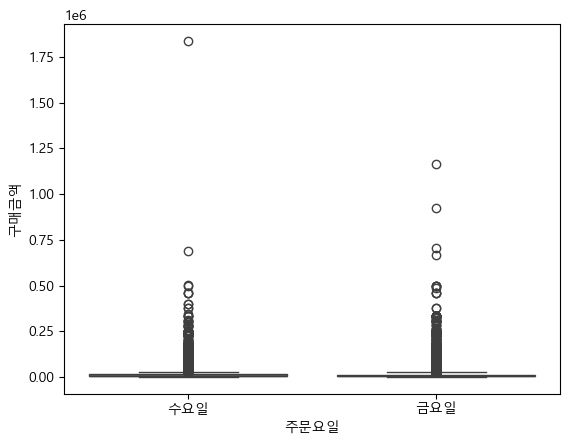

In [7]:
#귀무가설:수요일 금요일 평일별 구매금액 차이가없다
#대립가설 :수요일 금요일별 구매금액 차이가 있다
t1= df[df['주문요일'] == '수요일']['구매금액'] 
t2= df[df['주문요일'] == '금요일']['구매금액']
df_filtered = df[df['주문요일'].isin(['수요일', '금요일'])]
sns.boxplot(x='주문요일', y='구매금액', data=df_filtered )
t_stat, p_value = stats.ttest_ind(t1, t2)
print("t-statistic:", t_stat)
print("p-value:", p_value)
#귀무가설:수요일 금요일 평일별 구매금액 차이가있다  대립가설채택 수요일이 구매금액 많다

t-statistic: -2.1185482869790833
p-value: 0.034129904059828436


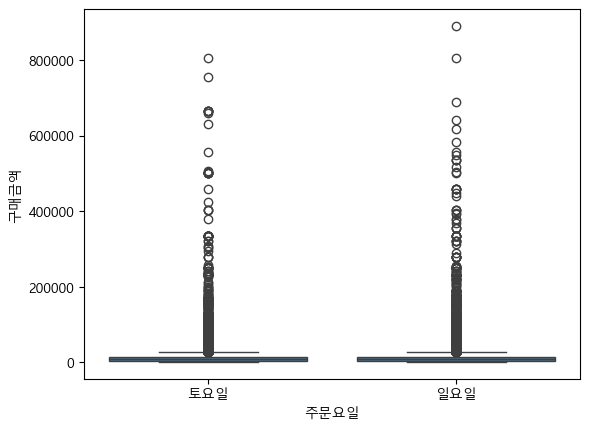

In [107]:
#귀무가설:수요일 목요일 평일별 구매금액 차이가없다
#대립가설 :수요일 목요일별 구매금액 차이가 있다
t1= df[df['주문요일'] == '토요일']['구매금액'] 
t2= df[df['주문요일'] == '일요일']['구매금액']
df_filtered = df[df['주문요일'].isin(['토요일', '일요일'])]
sns.boxplot(x='주문요일', y='구매금액', data=df_filtered )
t_stat, p_value = stats.ttest_ind(t1, t2)
print("t-statistic:", t_stat)
print("p-value:", p_value)
#대립가설:수요일 목요일 평일별 구매금액 차이가없다  대립가설 채택  수요일이 구매금액이 많다

# 주소지별 배송기간
p-value가 0.05보다 크므로 주소지별 배송기간의 차이는 없다 귀무가설 채택

In [312]:
contingency_table = pd.crosstab(df['배송기간'], df['주소지'])

# 카이제곱 검정 수행
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print('Chi-square statistic:', chi2)
print(f'P-value: {p_value:.3f}')
print('Degrees of freedom:', dof)
print("Expected frequencies table:")
pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)

Chi-square statistic: 122.63224077786187
P-value: 0.062
Degrees of freedom: 100
Expected frequencies table:


주소지,강원,강원도,경기,경기도,경상남도,경상북도,광주,광주광역시,대구광역시,대전광역시,...,서울,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
배송기간,,,,,,,,,,,,,,,,,,,,,
0 days,10.668529,13671.488339,295.008027,52618.577923,29806.943091,17039.496646,119.209218,8451.330581,16654.965743,11513.662331,...,9.276982,34940.361068,2802.112406,10248.745839,11487.222933,8758.862533,13054.569038,3030.790012,12806.873619,12042.450304
1 days,8.772725,11242.056526,242.584921,43268.224547,24510.231132,14011.567704,98.025668,6949.523984,13695.368176,9467.677516,...,7.628457,28731.437605,2304.175323,8427.537455,9445.936414,7202.407321,10734.764161,2492.216779,10531.084369,9902.499543
2 days,3.493413,4476.733033,96.600469,17229.969416,9760.292622,5579.588382,39.035095,2767.390781,5453.673621,3770.152248,...,3.037751,11441.231906,917.552563,3355.954956,3761.494659,2868.092212,4274.722620,992.433115,4193.614679,3943.304031
3 days,0.030830,39.508259,0.852523,152.058676,86.136959,49.241226,0.344494,24.422898,48.129998,33.272512,...,0.026809,100.971658,8.097625,29.617120,33.196106,25.311612,37.725468,8.758464,37.009671,34.800618
4 days,0.024759,31.727741,0.684632,122.113158,69.173667,39.543956,0.276652,19.613200,38.651567,26.720024,...,0.021529,81.086909,6.502927,23.784503,26.658666,20.326896,30.296042,7.033625,29.721210,27.947195
5 days,0.009744,12.486101,0.269429,48.056280,27.222530,15.562086,0.108873,7.718557,15.210896,10.515369,...,0.008473,31.910854,2.559155,9.360127,10.491222,7.999425,11.922672,2.768005,11.696453,10.998309


# 연령대별 구독여부
#귀무가설:연령대별 구독여부 차이가 없다
#대립가설:연령대별 구독여부차이가 있다.
p-value가 0이므로 대립가설 채택
특히 30대 40대 에 구독회수가 많은걸 볼수있다

Chi-square statistic: 680.0142919276262
P-value: 0.000
Degrees of freedom: 7
Expected frequencies table:


<Axes: xlabel='구독여부', ylabel='연령대'>

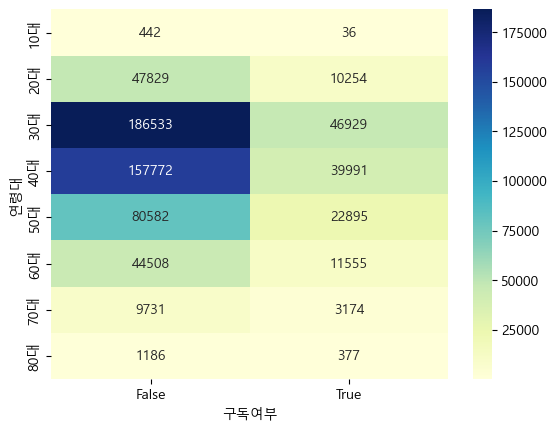

In [394]:
#귀무가설:연령대별 구독여부 차이가 없다
#대립가설:연령대별 구독여부차이가 있다.
date= df.groupby('연령대')['구독여부'].value_counts().unstack().fillna(0)
# 카이제곱 검정 수행
chi2, p_value, dof, expected = chi2_contingency(date)

print('Chi-square statistic:', chi2)
print(f'P-value: {p_value:.3f}')
print('Degrees of freedom:', dof)
print("Expected frequencies table:")
sns.heatmap(date, annot=True, cmap='YlGnBu', fmt='.0f')
#대립가설:연령대별 구독여부차이가 있다. 채택